In [1]:
# Import Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load datasets
dataset_path = 'datasets/London Housing Data.csv'
london = pd.read_csv(dataset_path)


In [3]:
# Dataset exploration
london.head()


,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


In [4]:
# Dataset info
london.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 635.2+ KB


In [5]:
# Dataset Basic Statistics
london.describe()


,average_price,houses_sold,no_of_crimes
count,1.354900e+04,13455.000000,7439.000000
mean,2.635197e+05,3893.994129,2158.352063
std,1.876175e+05,12114.402476,902.087742
min,4.072200e+04,2.000000,0.000000
25%,1.323800e+05,247.000000,1623.000000
50%,2.229190e+05,371.000000,2132.000000
75%,3.368430e+05,3146.000000,2582.000000
max,1.463378e+06,132163.000000,7461.000000


In [6]:
# Dataset shape (Rows, Columns)
london.shape


(13549, 6)

In [7]:
# Dataset column names
london.columns


Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes'], dtype='object')

In [9]:
# Dataset Columns Null Values
london.isna().sum()


date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

In [13]:
# Mean of `houses_sold` column
houses_sold_mean = london['houses_sold'].mean()
houses_sold_mean


3893.9941285767372

In [15]:
# Fill `houses_sold` null values with mean
london['houses_sold'].fillna(houses_sold_mean, inplace = True)


In [18]:
# Mean of `no_of_crimes` column
no_of_crimes_mean = london['no_of_crimes'].mean()
no_of_crimes_mean


2158.3520634493884

In [19]:
# Fill `no_of_crimes` null values with mean
london['no_of_crimes'].fillna(no_of_crimes_mean, inplace = True)


In [23]:
# Convert `date` column to datetime type 
london['date'] = pd.to_datetime(london['date'])


In [26]:
# Count values of `area` column
london['area'].value_counts()


south east                302
hackney                   302
enfield                   302
tower hamlets             302
westminster               301
north west                301
inner london              301
barnet                    301
islington                 301
east midlands             301
greenwich                 301
hounslow                  301
city of london            301
southwark                 301
outer london              301
waltham forest            301
havering                  301
london                    301
east of england           301
newham                    301
bromley                   301
bexley                    301
yorks and the humber      301
barking and dagenham      301
wandsworth                301
england                   301
redbridge                 301
hillingdon                301
hammersmith and fulham    301
kingston upon thames      301
croydon                   301
brent                     301
haringey                  301
lambeth   

In [29]:
# Count values of dataset columns
london.count()


date             13549
area             13549
average_price    13549
code             13549
houses_sold      13549
no_of_crimes     13549
dtype: int64

In [36]:
# Count Mean of `houses_sold` for each `area`
area_grp = london.groupby('area')['houses_sold'].mean()
area_grp.to_frame().sort_values('houses_sold', ascending = False)


,houses_sold
area,
england,76695.764081
south east,13929.794644
london,10439.089662
north west,9644.744147
east of england,9360.757436
south west,8795.511589
yorks and the humber,7280.896971
west midlands,7098.890326
east midlands,6782.431855


In [60]:
area_grp.to_frame().sort_values('houses_sold', ascending = False).style.background_gradient(cmap = 'Reds')


,houses_sold
area,
england,76695.764081
south east,13929.794644
london,10439.089662
north west,9644.744147
east of england,9360.757436
south west,8795.511589
yorks and the humber,7280.896971
west midlands,7098.890326
east midlands,6782.431855


In [66]:
# Count Mean of `no_of_crimes` and `average_price` for each `area`
no_of_crimes_avg_grp = london.groupby('area')[['no_of_crimes', 'average_price']].mean()
no_of_crimes_avg_grp.sort_values(['no_of_crimes', 'average_price'], ascending = [False, True])\
                    .style.background_gradient(cmap = 'Reds')


,no_of_crimes,average_price
area,,
westminster,4542.007803,543865.936877
lambeth,2906.496175,279398.428571
camden,2841.715444,467500.910299
southwark,2820.406474,275004.581395
newham,2685.645676,195646.066445
croydon,2534.635710,209349.671096
ealing,2499.728733,274537.322259
hackney,2474.856625,284985.331126
tower hamlets,2449.455962,257253.016556


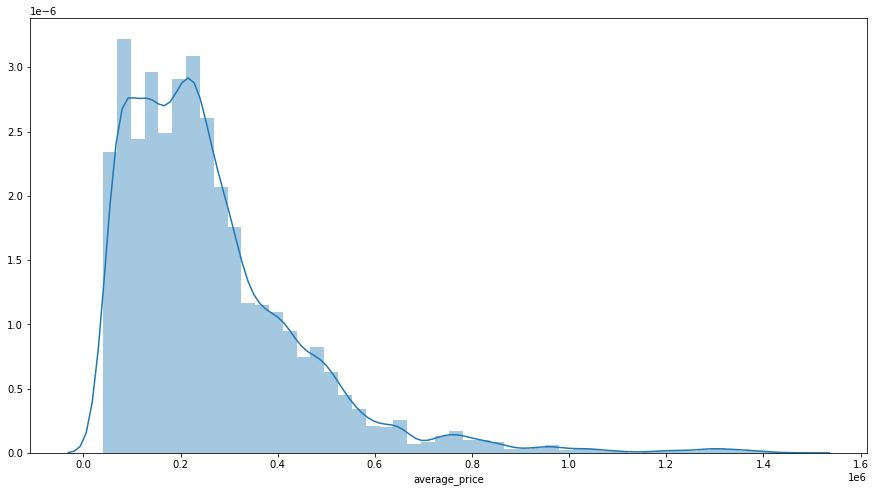

In [71]:
# Plot of average_price values
fig, ax = plt.subplots(figsize = (15, 8))
sns.distplot(london['average_price'])
plt.show()


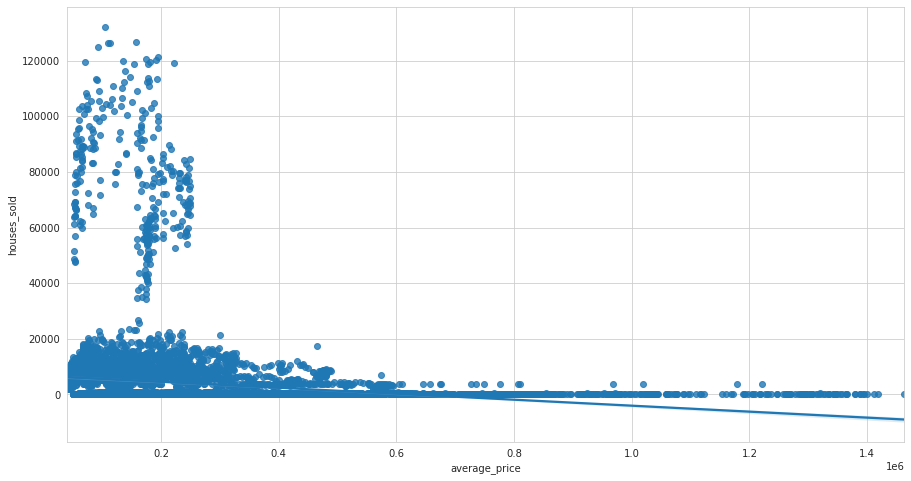

In [76]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize = (15, 8))
sns.regplot('average_price', 'houses_sold', data = london)
plt.show()


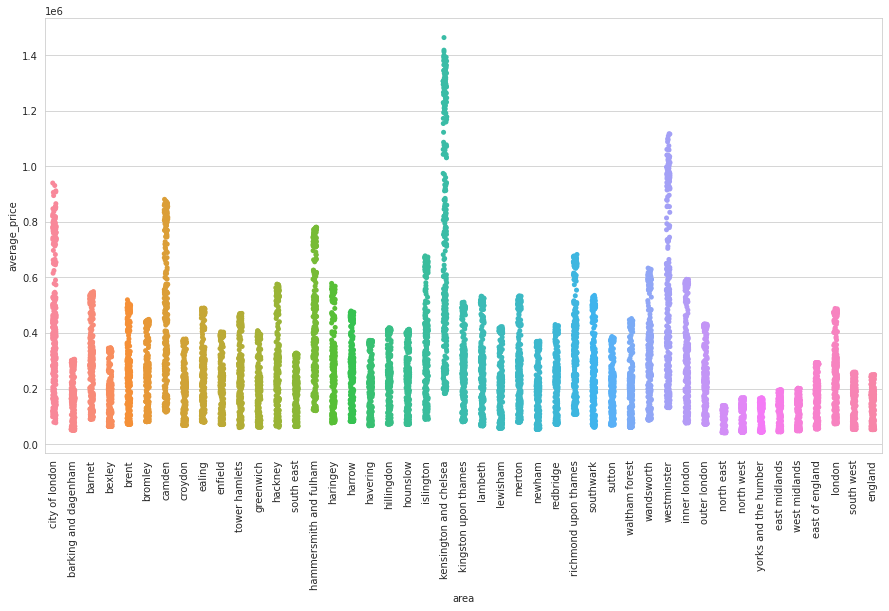

In [80]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.stripplot('area', 'average_price', data = london, ax = ax)
plt.xticks(rotation = 90)
plt.show()


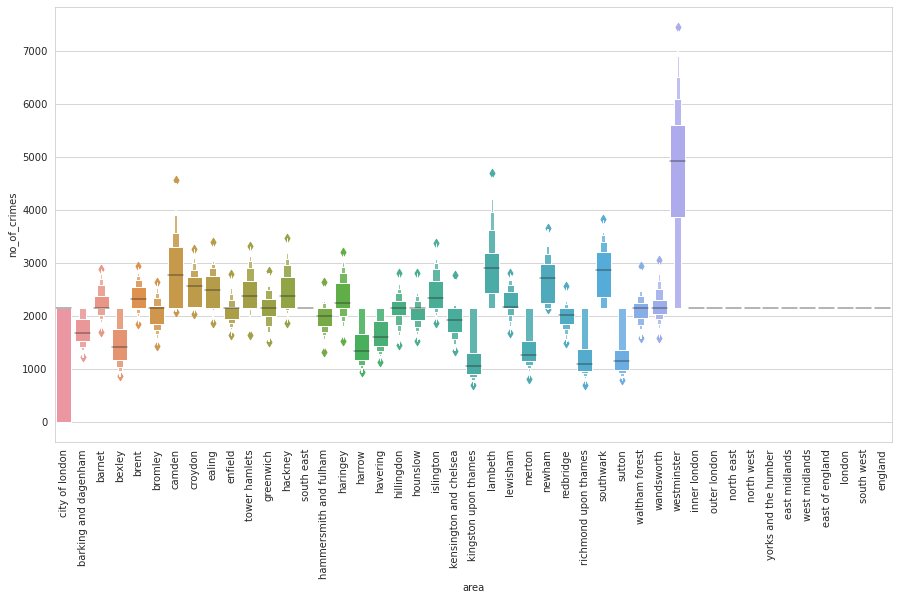

In [82]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.boxenplot('area', 'no_of_crimes', data = london, ax = ax)
plt.xticks(rotation = 90)
plt.show()


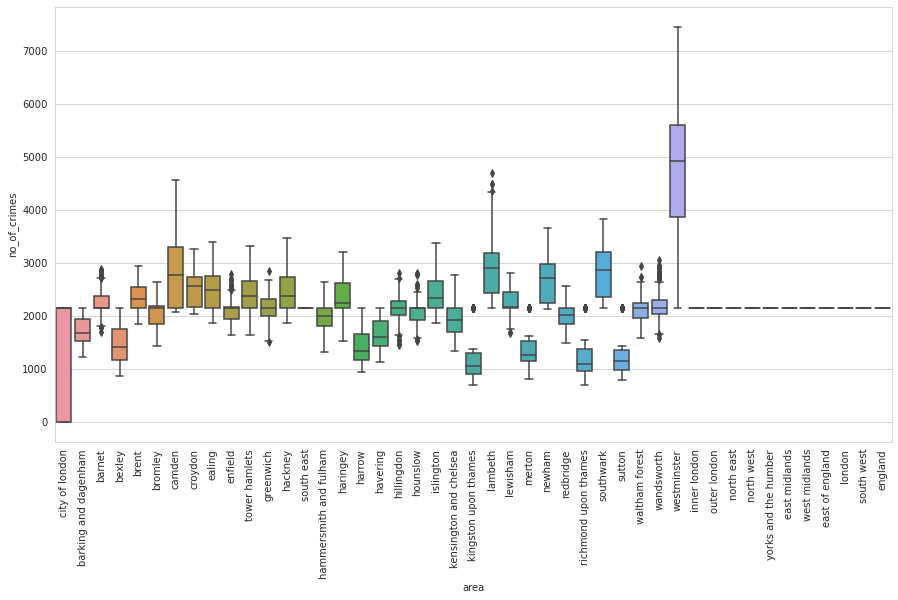

In [83]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.boxplot('area', 'no_of_crimes', data = london, ax = ax)
plt.xticks(rotation = 90)
plt.show()


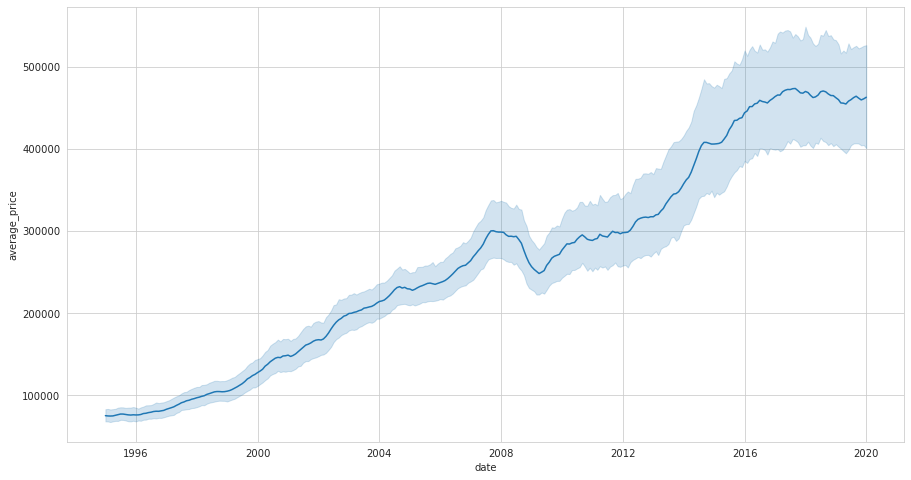

In [92]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.lineplot('date', 'average_price', data = london, ax = ax)
plt.show()


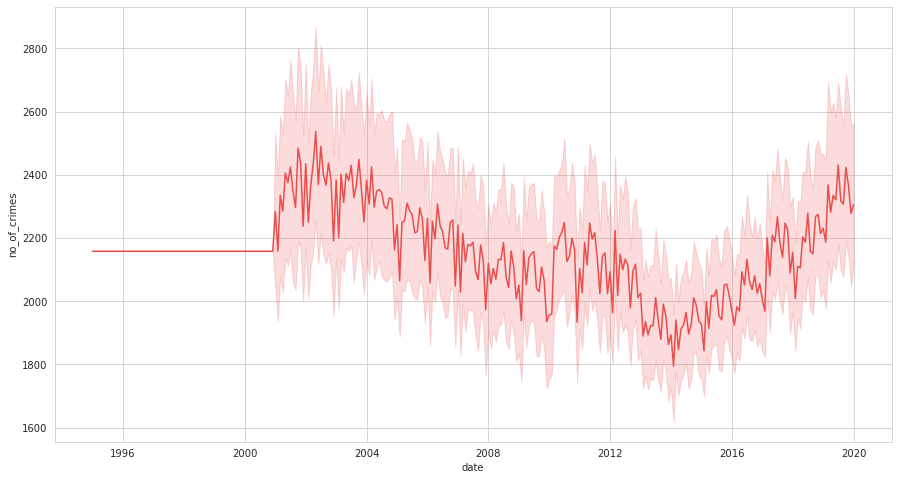

In [94]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.lineplot('date', 'no_of_crimes', data = london, ax = ax, color = '#eb4d4b')
plt.show()


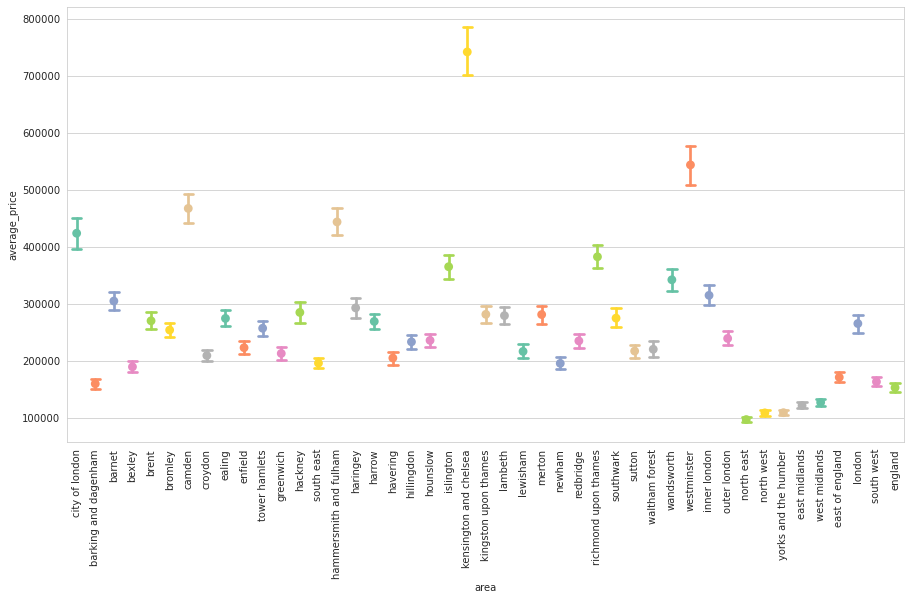

In [106]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.pointplot('area', 'average_price', data = london, ax = ax,
              linestyles = '--', palette = 'Set2', capsize = 0.5)
plt.xticks(rotation = 90)
plt.show()


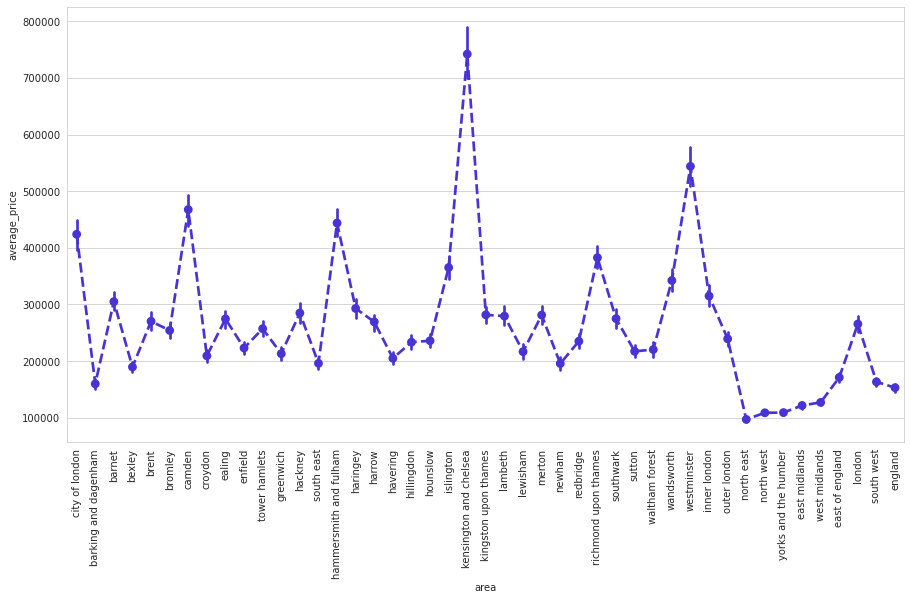

In [107]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.pointplot('area', 'average_price', data = london, ax = ax,
              linestyles = '--', color = '#4834d4')
plt.xticks(rotation = 90)
plt.show()
